In [661]:
# usamos libreria de Algebra Linear
using LinearAlgebra

## Seteo de frecuencias características (parámetros)

In [662]:
# Definimos frecuencias caracteristicas
Δ = Float64(-10); println("Δ = ",Δ);
Ω = abs(Float64(0.2)*Δ); println("Ω = Δ/5 = ",Ω);
println("ħ=1")

Δ = -10.0
Ω = Δ/5 = 2.0
ħ=1


In [663]:
# Definimos el hamiltoniano a diagonalizar
H = Matrix{Float64}(undef, 3, 3) # creamos matriz
H[:,:] = zeros(3,3)              # inicializamos matriz
H[1,1] = -Δ; H[1,2] = Ω; H[1,3] = Ω;
H[2,1] = H[1,2] ; H[3,1] = H[1,3];

In [664]:
# Mostramos en pantalla el hamiltoniano
println("H="); H

H=


3×3 Matrix{Float64}:
 10.0  2.0  2.0
  2.0  0.0  0.0
  2.0  0.0  0.0

In [665]:
# calculamos las autoenergías del hamiltoniano (autovalores)
H_eigenvals = copy(eigvals(H))

3-element Vector{Float64}:
 -0.7445626465380286
 -1.8824001961720216e-17
 10.744562646538029

In [666]:
# calculamos los autoestados del hamiltonioano (autovectores)
H_eigenvectors = copy(eigvecs(H))

3×3 Matrix{Float64}:
  0.25457    2.22045e-16  -0.967054
 -0.683811  -0.707107     -0.180008
 -0.683811   0.707107     -0.180008

In [667]:
# Almacenamos los autoestados y autoenergías en variables (en el caso de que sean útiles después)
ϕ1 = copy(H_eigenvectors[:,1]); ϵ1= H_eigenvals[1]; # primer autoestado y autoenergía
ϕ2 = copy(H_eigenvectors[:,2]); ϵ2= H_eigenvals[2]; # segundo autoestado y autoenergía
ϕ3 = copy(H_eigenvectors[:,3]); ϵ3= H_eigenvals[3]; # tercer autoestado y autoenergía

In [668]:
# definimos el estado inicial (fundamental), estado auxiliar y estado excitado
g=[Float64(0),Float64(1),Float64(0)]; # vector columna (estado inicial)
a=[Float64(1),Float64(0),Float64(0)]; # vector columna (estado auxiliar)
e=[Float64(0),Float64(0),Float64(1)]; # vector columna (estado excitado)

# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=1.5;n=Int32(10000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

## Creamos una función de evolución
### Ecuación de schröedinger dependiente del tiempo

In [669]:
# Calculamos cuál es la descomposición del estado inicial en los autoestados del hamiltoniano
# |ψ0⟩=(a1*|ϕ1⟩+a2*|ϕ2⟩+a3*|ϕ3⟩) := estado inicial (vector columna)

function lineal_superposition(H_eigenvectors,ϕ)
    # vector columna de coeficientes de descomposición coeff_vector := [a1,a2,a3]
    coeff_vector = zero(Array{ComplexF64}(undef,length(H_eigenvectors[1,:])))
    coeff_vector = inv(H_eigenvectors)*ϕ
    return coeff_vector
end

lineal_superposition (generic function with 1 method)

In [670]:
function evolution(ψ0::Array{Float64},H_eigenvals::Array{Float64},H_eigenvectors::Matrix{Float64},time_vector::Array{Float64})

    # Calculamos cuál es la descomposición del estado inicial en los autoestados del hamiltoniano
    # |ψ0⟩=(a1*|ϕ1⟩+a2*|ϕ2⟩+a3*|ϕ3⟩) := estado inicial (vector columna)

    # vector columna de coeficientes de descomposición coeff_vector := [a1,a2,a3]
    coeff_vect = lineal_superposition(H_eigenvectors,ψ0)

    dim_time = length(time_vector)
    dim_eigvecs = length(H_eigenvectors[1,:])
    dim_eigvals = length(H_eigenvals)

    ψ_t = zero(Matrix{ComplexF64}(undef,dim_eigvecs,dim_time));

    for i in 1:dim_time
        for j in 1:dim_eigvecs
            for k in 1:dim_eigvals
                ψ_t[j,i]=ψ_t[j,i]+exp(-im*H_eigenvals[k]*(time_vector[i]-time_vector[1]))*coeff_vect[j]*H_eigenvectors[j,k]
            end
        end
    end
    return ψ_t
end

evolution (generic function with 1 method)

## Realizamos la evolución del sistema con los parámetros específicos

In [671]:
ψ_t=evolution(g,H_eigenvals,H_eigenvectors,time_vector)

3×10000 Matrix{ComplexF64}:
  0.487204+0.0im   0.487204-0.00108533im   …  -0.683107+0.106467im
   1.11081+0.0im    1.11081-0.000151156im      0.595244+0.485162im
 0.0282094+0.0im  0.0282094-3.84797e-5im      -0.103039+0.123508im

### Calculamos la población ,$p_{e}(t)$, del estado excitado, $|e⟩$;

In [672]:
# calculamos valores útiles
dim_time = length(time_vector)
dim_eigvecs = length(H_eigenvectors[1,:])

# definimos vector de probabilidades (población del estado excitado)
pe_complex=Array{ComplexF64}(undef, dim_time);
pe=Array{Float64}(undef, dim_time);
coeff_vect_e = lineal_superposition(H_eigenvectors,e);

# definimos vector de probabilidades (población del estado fundamental)
pg_complex=Array{ComplexF64}(undef, dim_time);
pg=Array{Float64}(undef, dim_time);
coeff_vect_g = lineal_superposition(H_eigenvectors,g);

# definimos vector de probabilidades (población del estado auxiliar)
pa_complex=Array{ComplexF64}(undef, dim_time);
pa=Array{Float64}(undef, dim_time);
coeff_vect_a = lineal_superposition(H_eigenvectors,a);

for i in 1:dim_time
    ψ_t[:,i]=ψ_t[:,i]/norm(ψ_t[:,i]);                   # normalizamos la vector de estado

    pe_complex[i]=conj(transpose(coeff_vect_e))*ψ_t[:,i];          # computamos ⟨e|ψt⟩
    pe_complex[i]=conj(pe_complex[i])*pe_complex[i];    # computamos ⟨ψt|e⟩⟨e|ψt⟩
    pe[i]=convert(Float64, pe_complex[i]);

    pg_complex[i]=conj(transpose(coeff_vect_g))*ψ_t[:,i];          # computamos ⟨e|ψt⟩
    pg_complex[i]=conj(pg_complex[i])*pg_complex[i];    # computamos ⟨ψt|e⟩⟨e|ψt⟩
    pg[i]=convert(Float64, pg_complex[i]);

    pa_complex[i]=conj(transpose(coeff_vect_a))*ψ_t[:,i];          # computamos ⟨e|ψt⟩
    pa_complex[i]=conj(pa_complex[i])*pa_complex[i];    # computamos ⟨ψt|e⟩⟨e|ψt⟩
    pa[i]=convert(Float64, pa_complex[i]);
end

### Ploteamos los resultados

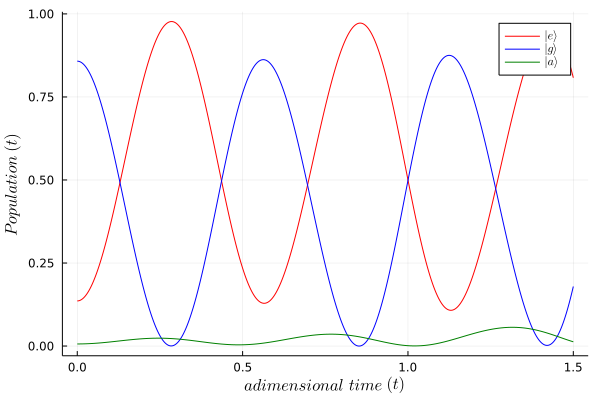

In [673]:
using Plots
plt = plot()
plot!(plt, time_vector, pe, color = :red, label = "\$|e⟩\$")
plot!(plt, time_vector, pg, color = :blue, label = "\$|g⟩\$")
plot!(plt, time_vector, pa, color = :green, label = "\$|a⟩\$")
plot!(ylabel = "\$Population\$ \$(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(plt, legend = :topright)

# Referencias

Podemos revisar un poco lo que ya está hecho en lenguaje Julia para cálculos relacionados a óptica cuántica en los siguientes enlaces:

+ [https://docs.qojulia.org/](https://docs.qojulia.org/)
+ [https://docs.qojulia.org/examples/raman/](https://docs.qojulia.org/examples/raman/)